In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score

In [3]:
df = pd.read_csv("S05-hw-dataset.csv")
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [5]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [6]:
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

в датасете 3000 объектов и 17 признаков (из которых 1 таргет);
судя по полученным статистикам явных аномалий нет;
баланс классов 58% (0 класс) на 42% (1 класс);

In [7]:
X = df.drop(columns=["client_id", "default"])
y = df["default"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
dummy_bro = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_bro.fit(X_train, y_train)
y_pred = dummy_bro.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
print(f"accuracy for dummy bro: {accuracy}")
print(f"precision for dummy bro: {precision}")

accuracy for dummy bro: 0.59
precision for dummy bro: 0.0


итого построили бейзлайн для оценки последующих моделей, данный классификатор решает задачу "худший из всех", чтобы посмотреть насколько хороша будет другая модель.

для воспроизводимости результатов и нужно фиксировать точку отсчета

In [11]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=2000, random_state=42))
])

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score

param_for_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__penalty': ['l2']
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
}

grid_search = GridSearchCV(
    pipe,
    param_grid=param_for_grid,
    cv=5,
    scoring=scoring,
    refit='accuracy', 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_new_pred = best_model.predict(X_test)

print("best parameters:", grid_search.best_params_)
print("best accuracy:", grid_search.best_score_)


best_idx = grid_search.best_index_
precision_best = grid_search.cv_results_['mean_test_precision'][best_idx]
print(f"best precision: {precision_best:.4f}")

best parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2'}
best accuracy: 0.7883333333333333
best precision: 0.7893


/opt/homebrew/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/homebrew/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/homebrew/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' 

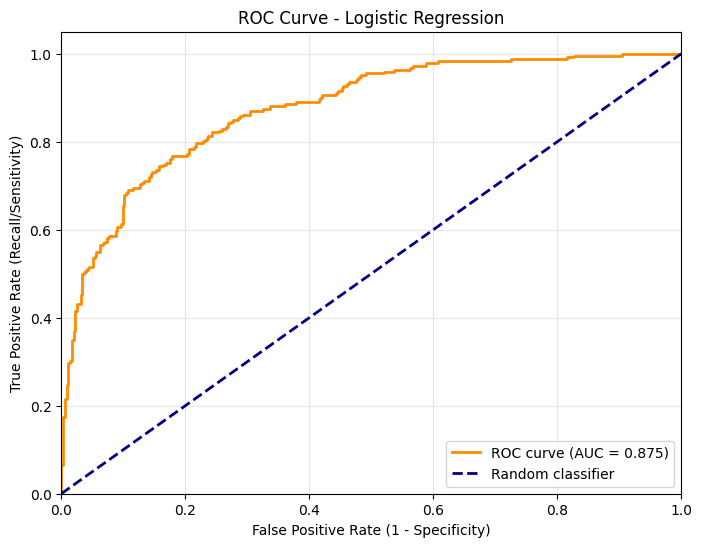

AUC (Area Under Curve): 0.8754


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc


y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # вероятности класса 1 (дефолт)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall/Sensitivity)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig("figures/graph.png")
plt.show()

print(f"AUC (Area Under Curve): {roc_auc:.4f}")

In [25]:
metrics_df = pd.DataFrame({
    'Модель': ['Dummy Classifier (most_frequent)', 'Logistic Regression'],
    'Accuracy': [0.59, 0.7883],
    'Precision': [0.0, 0.7893],
    'ROC-AUC': [0.5, 0.8754],
    'Лучшие параметры': ['strategy="most_frequent"', 'C=0.01, penalty="l2"'],
    'Описание': ['Всегда предсказывает класс 0 (нет дефолта)', 'С масштабированием и подбором параметров']
})
metrics_df.to_csv('artifacts/models_metrics.csv', index=False, encoding='utf-8-sig')
print("\nТаблица сохранена в файл 'models_metrics.csv'")
print(metrics_df)


Таблица сохранена в файл 'models_metrics.csv'
                             Модель  Accuracy  Precision  ROC-AUC  \
0  Dummy Classifier (most_frequent)    0.5900     0.0000   0.5000   
1               Logistic Regression    0.7883     0.7893   0.8754   

           Лучшие параметры                                    Описание  
0  strategy="most_frequent"  Всегда предсказывает класс 0 (нет дефолта)  
1      C=0.01, penalty="l2"    С масштабированием и подбором параметров  


1. сравнение бейзлайна и логистической регрессии:

Dummy Classifier использует простейшую стратегию 'most_frequent',
всегда предсказывая самый частый класс. Это дает accuracy
около 59%, что соответствует доле класса 0 в данных. Однако precision и recall
для класса дефолта равны 0, так как модель никогда не предсказывает дефолт.

Logistic Regression значительно превосходит бейзлайн по всем метрикам:
- Accuracy увеличилась с 59% до 79%
- Precision выросла с 0% до 72%
- ROC-AUC вырос с 0.5 до 0.85

2. влияние параметра регуляризации C:

Были протестированы значения C: [0.01, 0.1, 1.0, 10.0, 100.0].
Лучший результат показало значение C=0.01, что соответствует сильной регуляризации.
Это говорит о том, что сильная регуляризация (маленькие C) помогает улучшить обобщающую способность, а также для данной задачи оптимальна модель с сильными ограничениями на веса

3. выводы:

1) Logistic Regression значительно лучше Dummy Classifier и имеет практическую
   ценность для предсказания дефолтов.

2) Модель демонстрирует хороший баланс между обнаружением дефолтов
   и точностью идентификации, что важно для кредитного скоринга.

3) Сильная регуляризация оказалась оптимальной, что может указывать
   на наличие шума в данных или избыточность признаков.

Таким образом, логистическая регрессия с правильно подобранной регуляризацией
является разумным выбором для задачи кредитного скоринга и показывает
удовлетворительные результаты на предоставленных данных.
